<a href="https://colab.research.google.com/github/Goluyadavu/notebooks/blob/main/notebooks/how-to-use-ultralytics-yolo-with-sahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-use-ultralytics-yolo-with-sahi.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the <a href="https://docs.ultralytics.com/guides/sahi-tiled-inference/">Ultralytics YOLO11 with SAHI notebook 🚀</a>. YOLO11 is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope that the resources in this notebook will help you get the most out of YOLO11 usage with SAHI. Please browse the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Ultralytics YOLO11 with SAHI

This notebook serves as the starting point for using the YOLO11 model with [SAHI (Slicing Aided Hyper Inference)](https://docs.ultralytics.com/guides/sahi-tiled-inference/).

### What is Sliced Inference?

Sliced Inference refers to the practice of subdividing a large or high-resolution image into smaller segments (slices), conducting object detection on these slices, and then recompiling the slices to reconstruct the object locations on the original image. This technique is invaluable in scenarios where computational resources are limited or when working with extremely high-resolution images that could otherwise lead to memory issues.

### Benefits of Sliced Inference

- **Reduced Computational Burden**: Smaller image slices are faster to process, and they consume less memory, enabling smoother operation on lower-end hardware.

- **Preserved Detection Quality**: Since each slice is treated independently, there is no reduction in the quality of object detection, provided the slices are large enough to capture the objects of interest.

- **Enhanced Scalability**: The technique allows for object detection to be more easily scaled across different sizes and resolutions of images, making it ideal for a wide range of applications from satellite imagery to medical diagnostics.

### Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [1]:
%pip install ultralytics sahi
import ultralytics
ultralytics.checks()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


### Clone Repository

- Clone the `ultralytics` repository.
- `%cd` to the examples section.
- Move to `YOLOv8-SAHI-Inference-Video` folder.

In [2]:
# Clone ultralytics repo
!git clone https://github.com/ultralytics/ultralytics

# Install dependencies
!pip install -U sahi ultralytics

# cd to local directory
%cd ultralytics/examples/YOLOv8-SAHI-Inference-Video

Cloning into 'ultralytics'...
remote: Enumerating objects: 51081, done.
remote: Counting objects: 100% (550/550), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 51081 (delta 485), reused 293 (delta 293), pack-reused 50531 (from 3)
Receiving objects: 100% (51081/51081), 29.07 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (37775/37775), done.
/content/ultralytics/examples/YOLOv8-SAHI-Inference-Video


### Inference using SAHI

The output results will be stored in `ultralytics/ultralytics/examples/YOLOv8-SAHI-Inference-Video/`

In [4]:
#inference (default latest model will be selected i.e yolo11n.pt)
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --view-img

# save the results
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --save-img

#if you want to change model file
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --weights "yolo11n.pt"

yolo11n.pt: 100% 5.35M/5.35M [00:00<00:00, 147MB/s]
Performing prediction on 9 slices.
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.11/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.

Performing prediction on 9 slices.
Performing prediction on 9 slices.


<p align="center">
  <img width="1024" src="https://github.com/ultralytics/docs/releases/download/0/yolo11n-vs-sahi-yolo11n.avif" alt="SAHI Sliced Inference Overview">
</p>

In [7]:
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --save-img

Performing prediction on 9 slices.


### Additional Arguments

- `--source`: Specifies the path to the video file you want to run inference on.
- `--save-img`: Flag to save the detection results as images.
- `--weights`: Specifies a different YOLO11 model file (e.g., yolo11n.pt, yolov8s.pt, yolo11m.pt, yolo11l.pt, yolo11x.pt).

In [9]:
!ls

models	readme.md  ultralytics_results_with_sahi  yolov8_sahi.py


In [10]:
from IPython.display import Image

# Run object detection and save results
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --save-img

# Assuming the output image is saved as 'IMG-20250101-WA0027.jpg' in the current directory
Image('IMG-20250101-WA0027.jpg')

Performing prediction on 9 slices.


FileNotFoundError: No such file or directory: 'IMG-20250101-WA0027.jpg'

FileNotFoundError: No such file or directory: 'IMG-20250101-WA0027.jpg'

<IPython.core.display.Image object>

In [11]:
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --save-img

# Add the following code to display the image after processing
from IPython.display import Image, display

# Assuming the output image is saved in a folder named 'runs/detect/predict' (or similar)
# and the output image name is the same as the input image with '_prediction' added, you may need to adjust the path accordingly

output_image_path = "runs/detect/predict/IMG-20250101-WA0027.jpg"  # Adjust this path if necessary

try:
    display(Image(filename=output_image_path))
except FileNotFoundError:
    print(f"Error: Could not find the output image at {output_image_path}.  Please check the path or if the YOLOv8 SAHI script ran successfully.")
except Exception as e:
    print(f"An error occurred while displaying the image: {e}")

Performing prediction on 9 slices.
Error: Could not find the output image at runs/detect/predict/IMG-20250101-WA0027.jpg.  Please check the path or if the YOLOv8 SAHI script ran successfully.


In [13]:
ls

models/  readme.md  ultralytics_results_with_sahi/  yolov8_sahi.py


In [14]:
!python yolov8_sahi.py --source "/content/IMG-20250101-WA0027.jpg" --save-img

# Add the following code to display the image after processing
from IPython.display import Image, display

# Assuming the output image is saved in a folder named 'ultralytics_results_with_sahi'
# and the output image name is the same as the input image with '_prediction' added, you may need to adjust the path accordingly

output_image_path = "ultralytics_results_with_sahi/IMG-20250101-WA0027.jpg"  # Adjust this path if necessary

try:
    display(Image(filename=output_image_path))
except FileNotFoundError:
    print(f"Error: Could not find the output image at {output_image_path}.  Please check the path or if the YOLOv8 SAHI script ran successfully.  Ensure the output path in yolov8_sahi.py is correctly configured.")
except Exception as e:
    print(f"An error occurred while displaying the image: {e}")

Performing prediction on 9 slices.
Error: Could not find the output image at ultralytics_results_with_sahi/IMG-20250101-WA0027.jpg.  Please check the path or if the YOLOv8 SAHI script ran successfully.  Ensure the output path in yolov8_sahi.py is correctly configured.


In [15]:
!pip install -U ultralytics sahi

In [16]:
from sahi.utils.file import download_from_url
from sahi.utils.ultralytics import download_yolo11n_model

# Download YOLO11 model
model_path = "models/yolo11n.pt"
download_yolo11n_model(model_path)

# Download test images
download_from_url(
    "https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg",
    "demo_data/small-vehicles1.jpeg",
)
download_from_url(
    "https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png",
    "demo_data/terrain2.png",
)

In [17]:
from sahi import AutoDetectionModel

detection_model = AutoDetectionModel.from_pretrained(
    model_type="ultralytics",
    model_path=model_path,
    confidence_threshold=0.3,
    device="cpu",  # or 'cuda:0'
)

In [20]:
from sahi.predict import get_prediction

# With an image path
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)
from sahi.predict import get_prediction

# With an image path
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

# With a numpy image
result_with_np_image = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

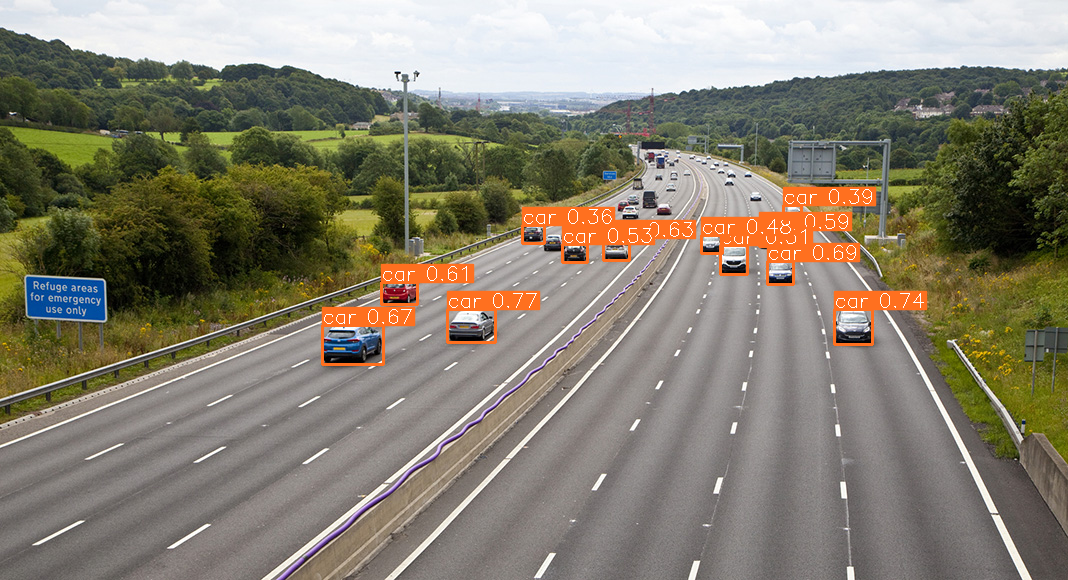

In [21]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

In [22]:
from sahi.predict import get_sliced_prediction

result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing prediction on 15 slices.


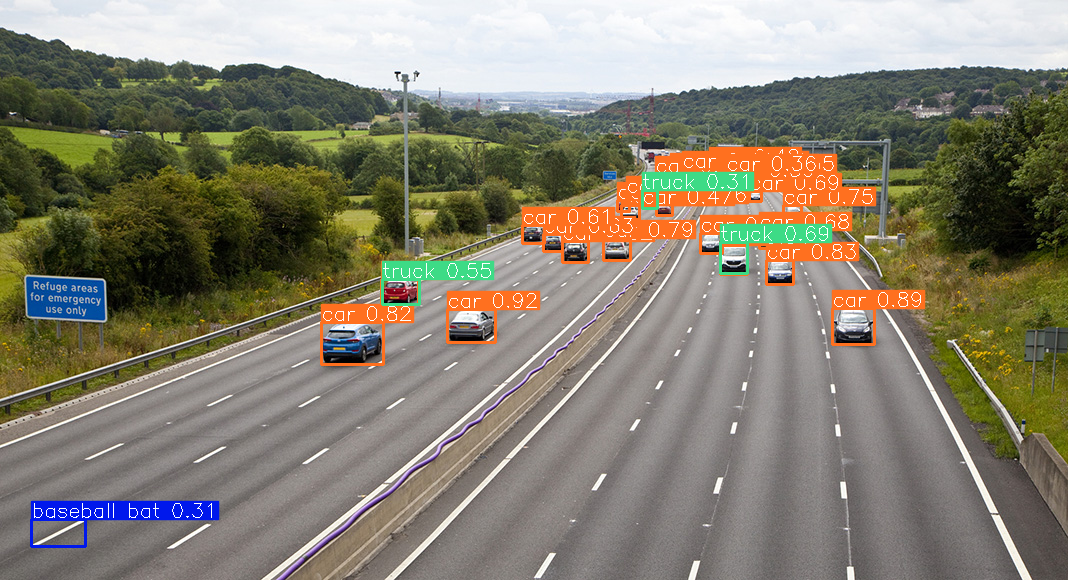

In [23]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")